==> Loaded Data_20190106_02_002
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4500
==> Loaded Data_20190106_02_003
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4500
==> Loaded Data_20190106_02_004
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4500
==> Loaded Data_20190106_02_005
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4500
==> Loaded Data_20190106_02_006
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4500
==> Added pixel index of surface reflection
==> Concatenated ['20190106_02_002', '20190106_02_003', '20190106_02_004', '20190106_02_005', '20190106_02_006'

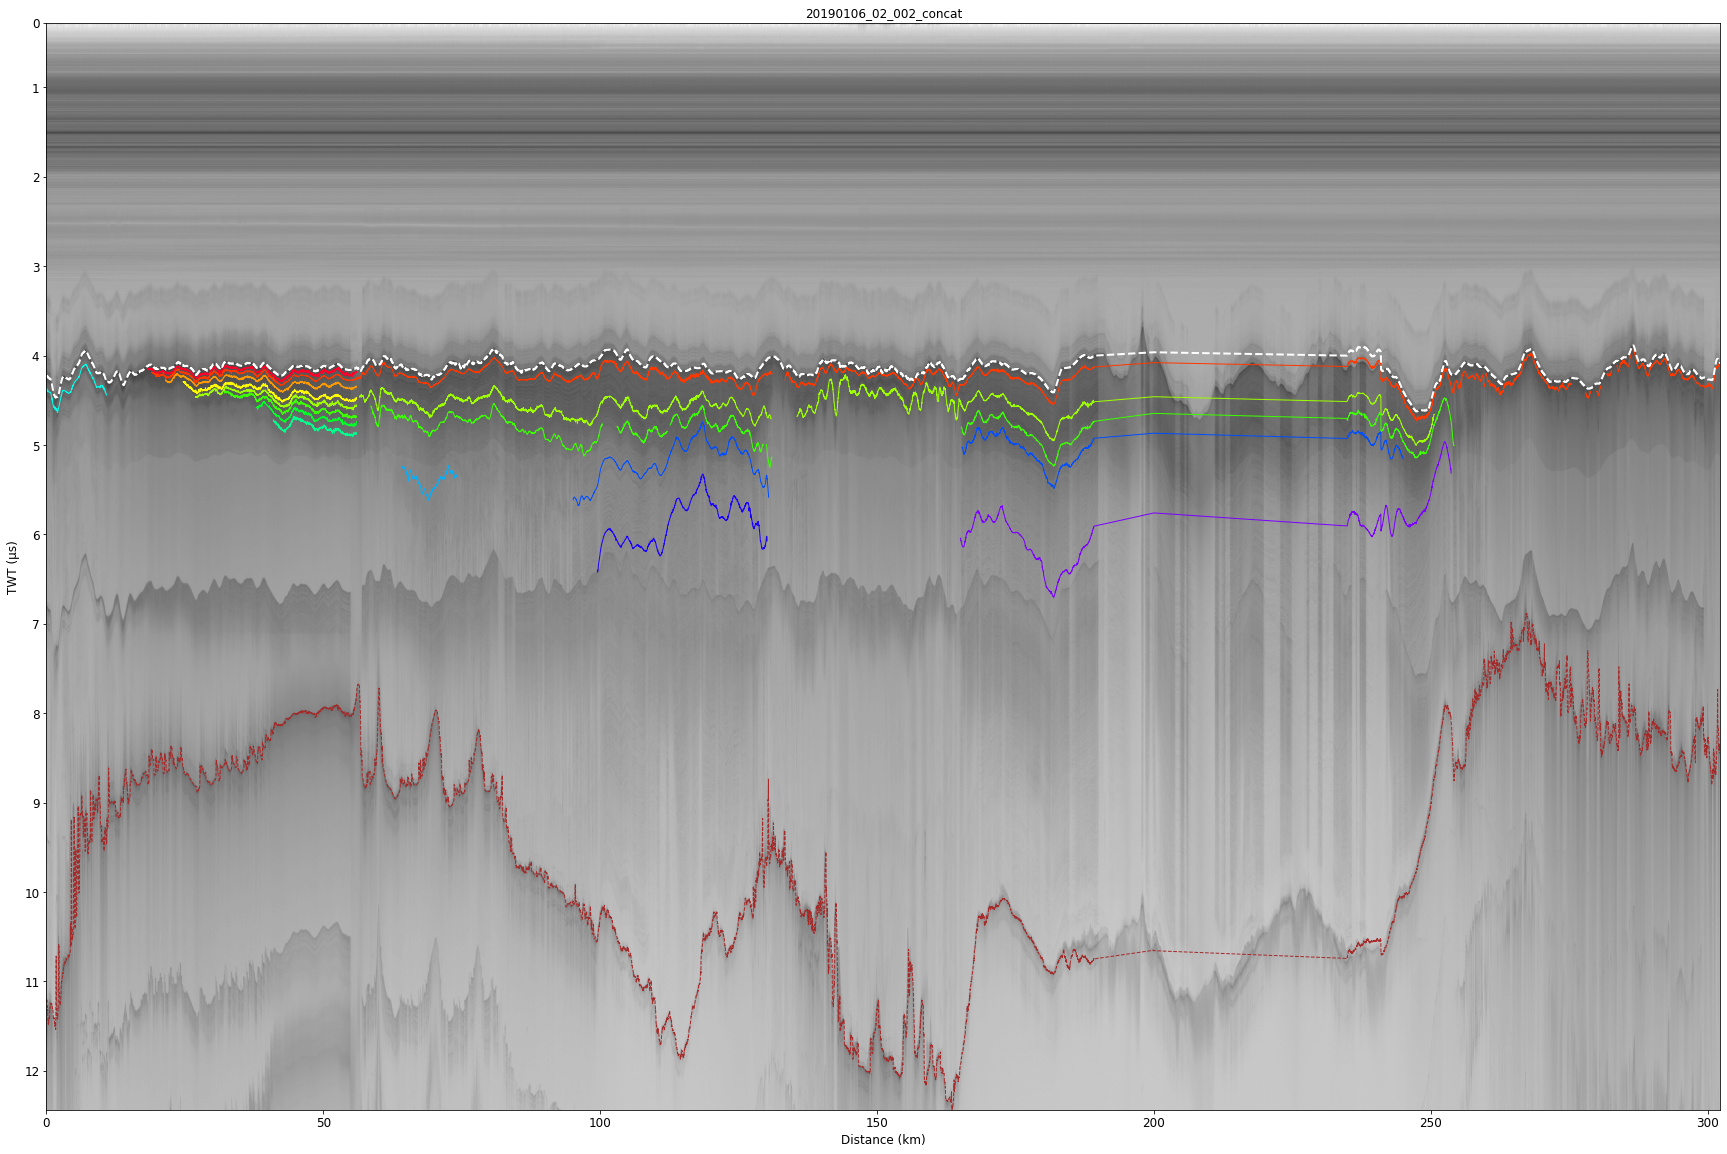

In [1]:
from operator import concat
from Cradar import Cradar
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd
from pathlib import Path
import glob#, os
import matplotlib.pyplot as plt


dir = 'C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/20190106_02_standard/'
os.chdir(dir)

if 1:

    filelist = []

    for matfile in sorted(glob.glob('Data*00[23456].mat')):

        crd = Cradar().load_cresis_mat(matfile, dB=False)
        crd.Frame = matfile.split('Data_')[-1].split('.mat')[0]
        crd.to_dB()
        crd.clip_range(start=0, end=4500)
        filelist.append(crd)

    crd = Cradar.concat_frames(filelist)

    ### add layers from pick file ###
    #   use closest coordinate

    picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')
    # picks = picks.replace('NaN',np.NaN)

    irh_list = ['IRH1', 'IRH2', 'IRH3', 'IRH4', 'IRH5', 'IRH6', 'IRH7', 
                'IRH8', 'IRH9', 'IRH10', 'IRH11', 'IRH12', 'IRH13', 'surface', 'base']

    # irh_list = ['surface']
    factor = 3.47e-6

    for irh in irh_list:
        layer_name = str(irh)
        layer_lon  = picks['lon']
        layer_lat  = picks['lat']
        if irh == 'surface':
            layer_val  = picks[irh] + factor
        else:
            layer_val  = picks[irh] + factor + picks['surface']

        crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)

    # layer_name = 'surface'
    # layer_lon  = picks['lon']
    # layer_lat  = picks['lat']
    # layer_val  = picks['surface'] + factor

    # crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
    # print('==> added layer: {}'.format(layer_name))

    # for irh in irh_list:
    #     traces                      = crd.Layer[irh]['trace']
    #     surface_tmp                 = crd.Surface[traces]
    #     crd.Layer[irh]['value_twt'] = crd.Layer[irh]['value_twt'] + surface_tmp

    crd.get_layer_idx()



if 1:
    crd.plot_echogram(figsize_x=30,
                    figsize_y=20,
                    range_mode='twt',
                    every_km_dist=50,
                    every_m_elev=1000,
                    every_twt_ms=1,
                    plot_surface=False,
                    plot_bed=False,
                    plot_layers=True,
                    xlabels_as_int=True,
                    ylabels_as_int=True,
                    fontsize=12,
                    show_figure=True, 
                    show_cbar=False,
                    cmap='binary',
                    save_svg=False, 
                    save_png=True, 
                    suffix='',
                    out_folder='',
                    dpi=400)

In [2]:
picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/Princess_Ragnild_Coast_airborne_IRHs_20190106_02_twt.txt'), skiprows=32, sep=' ')
picks.keys()

Index(['year_acq', 'month_acq', 'day_acq', 'surveyID', 'profileID', 'lon',
       'lat', 'psX', 'psY', 'trace', 'surface', 'base', 'year_pick',
       'month_pick', 'day_pick', 'IRH1', 'IRH2', 'IRH3', 'IRH4', 'IRH5',
       'IRH6', 'IRH7', 'IRH8', 'IRH9', 'IRH10', 'IRH11', 'IRH12'],
      dtype='object')

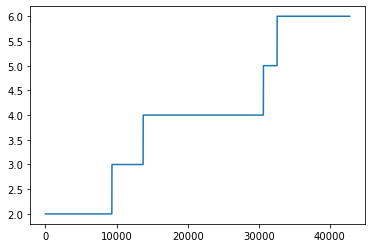

In [43]:
picks['profileID'].unique()
plt.plot(picks['profileID'])

original matrix (5x5 array)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


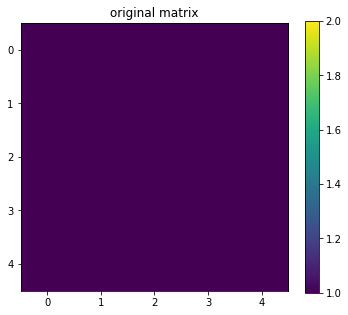


New matrix + random error (between 0-1)
[[1.04373117 1.12225042 1.98184746 1.41168911 1.22321097]
 [1.6160364  1.89993211 1.88125439 1.91112955 1.79082271]
 [1.98608118 1.22174399 1.43880269 1.93172311 1.53785487]
 [1.92671877 1.44990087 1.36793404 1.54176151 1.51985469]
 [1.33431003 1.65085415 1.81160312 1.22294379 1.87135928]]


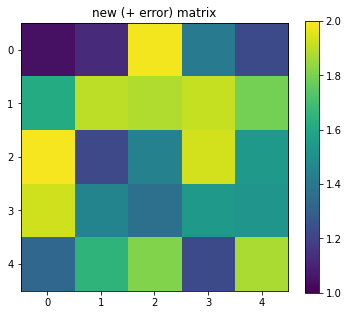

In [11]:
import numpy as np
import random 
import matplotlib.pyplot as plt

a = np.ones(shape=(5,5))
print('original matrix (5x5 array)')
print(a)

plt.subplots(figsize=(6,5))
im = plt.imshow(a, cmap='viridis', vmin=1, vmax=2)
plt.title('original matrix')
plt.colorbar(im)
plt.show()

with np.nditer(a, op_flags=['readwrite']) as it:
   for x in it:
       x[...] = random.random() +  x

print('')
print('New matrix + random error (between 0-1)')
print(a)

plt.subplots(figsize=(6,5))
im = plt.imshow(a, cmap='viridis', vmin=1, vmax=2)
plt.title('new (+ error) matrix')
plt.colorbar(im)
plt.show()


In [6]:
np.ones(shape=(5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [3]:
crd.Surface

array([1.53876426e-05, 1.53898171e-05, 1.53919905e-05, ...,
       4.59424827e-06, 4.59322057e-06, 4.59214888e-06])

==> Loaded Data_20190107_01_003
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--3000
==> added layer: IRH1
==> added layer: IRH2
==> added layer: IRH3
==> added layer: IRH4
==> added layer: IRH5
==> added layer: IRH6
==> added layer: IRH7
==> added layer: IRH8
==> added layer: IRH9
==> added layer: IRH10
==> added layer: IRH11
==> added layer: IRH12
==> added layer: surface
... getting layer idx for IRH1
... getting layer idx for IRH2
... getting layer idx for IRH3
... getting layer idx for IRH4
... getting layer idx for IRH5
... getting layer idx for IRH6
... getting layer idx for IRH7
... getting layer idx for IRH8
... getting layer idx for IRH9
... getting layer idx for IRH10
... getting layer idx for IRH11
... getting layer idx for IRH12
... getting layer idx for surface


C:\Users\sfranke\AppData\Local\Temp\ipykernel_21328\262684025.py:70: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  surf = pd.read_csv('CHIRP_Surface_TWT_V1.0.csv', sep='\t')


==> added layer: echos_surface
==> added layer: echos_surface_10
... getting layer idx for IRH1
... getting layer idx for IRH2
... getting layer idx for IRH3
... getting layer idx for IRH4
... getting layer idx for IRH5
... getting layer idx for IRH6
... getting layer idx for IRH7
... getting layer idx for IRH8
... getting layer idx for IRH9
... getting layer idx for IRH10
... getting layer idx for IRH11
... getting layer idx for IRH12
... getting layer idx for surface
... getting layer idx for echos_surface
... getting layer idx for echos_surface_10
==> Added pixel index of surface reflection
==> Added Spacing and Distance.
==> Written: figures/20190107_01_003.png


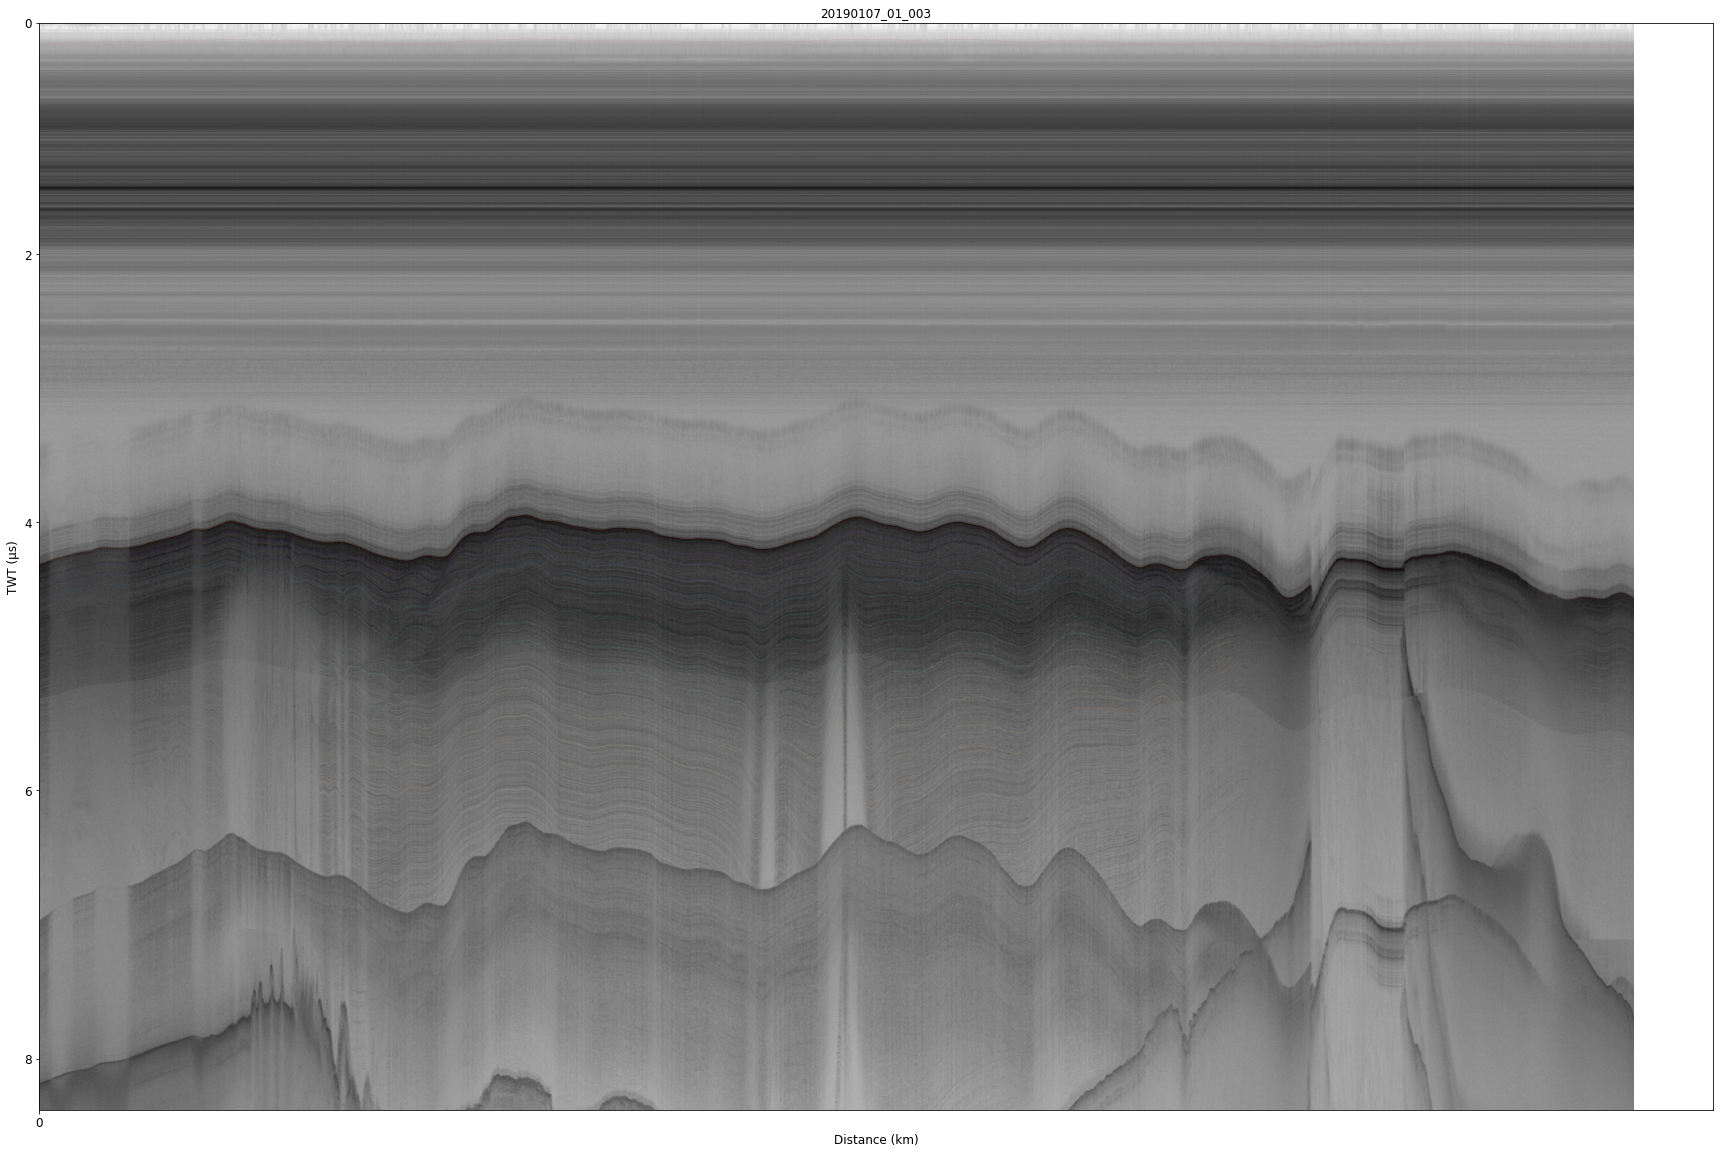

In [13]:
from operator import concat
from optparse import Values
from tkinter import Frame
from Cradar import Cradar
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd
from pathlib import Path
import glob#, os
import matplotlib.pyplot as plt

if 1:
    dir = 'C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/20190107_01_standard/'
    os.chdir(dir)

    matfile = 'Data_20190107_01_003.mat'

    crd = Cradar().load_cresis_mat(matfile, dB=False)
    crd.Frame = matfile.split('Data_')[-1].split('.mat')[0]
    crd.to_dB()
    crd.clip_range(start=0, end=3000)

    # filelist = []

    # for matfile in sorted(glob.glob('Data_20190107_01_003*.mat')):

    #     crd = Cradar().load_cresis_mat(matfile, dB=False)
    #     crd.Frame = matfile.split('Data_')[-1].split('.mat')[0]
    #     crd.to_dB()
    #     crd.clip_range(start=0, end=3000)
    #     filelist.append(crd)

    # crd = Cradar.concat_frames(filelist)

if 1:
    ### add layers from pick file ###
    #   use closest coordinate

    picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/Princess_Ragnild_Coast_airborne_IRHs_20190107_02_twt.txt'), skiprows=31, sep=' ')
    picks = picks[picks['profileID'] == 3].reset_index(drop=True)

    
    
    irh_list = ['IRH1', 'IRH2', 'IRH3', 'IRH4', 'IRH5', 'IRH6', 'IRH7', 
                'IRH8', 'IRH9', 'IRH10', 'IRH11', 'IRH12']

    #irh_list = ['surface']
    factor = 3.49e-6

    for irh in irh_list:
        layer_name = str(irh)
        layer_lon  = picks['lon']
        layer_lat  = picks['lat']
        layer_val  = picks[irh] + factor + picks['surface']

        crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)

    layer_name = 'surface'
    layer_lon  = picks['lon']
    layer_lat  = picks['lat']
    layer_val  = picks['surface'] + factor

    crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
    crd.get_layer_idx()

if 1:
    ### add layer by using segment, frame and trace ###

    surf = pd.read_csv('CHIRP_Surface_TWT_V1.0.csv', sep='\t')
    surf = surf[surf['Segment'] == '20190107_01']
    surf = surf[surf['Frame'] == 3]
    surf = surf[['Segment', 'Frame', 'CMP', 'Surf_TWT']]

    surf['Frame_'] = surf['Segment'].astype(str) + '_00' + surf['Frame'].astype(str)
    surf = surf.reset_index(drop=True)
    surf['Surf_TWT'] = surf['Surf_TWT'] * 10e-11

    layer_name = 'echos_surface'
    frame      = crd.Frame
    traces     = surf['CMP'].values
    values     = surf['Surf_TWT'].values
    values_10  = surf['Surf_TWT'].values * 10

    crd.add_layer_by_frame_trace(layer_name, frame, traces, values)
    crd.add_layer_by_frame_trace('echos_surface_10', frame, traces, values_10)
    crd.get_layer_idx()

if 1: 
    crd.plot_echogram(figsize_x=30,
                    figsize_y=20,
                    range_mode='twt',
                    every_km_dist=50,
                    every_m_elev=1000,
                    every_twt_ms=2,
                    plot_surface=False,
                    plot_bed=False,
                    plot_layers=True,
                    xlabels_as_int=True,
                    ylabels_as_int=True,
                    fontsize=12,
                    show_figure=True, 
                    show_cbar=False,
                    cmap='binary',
                    save_svg=False, 
                    save_png=True, 
                    suffix='',
                    out_folder='',
                    dpi=400)

In [12]:
crd.Time

5.459459459459365e-07

In [2]:
crd.Layer

{'echos_surface': {'trace': array([   2,    3,    4, ..., 3301, 3302, 3303], dtype=int64),
  'value_twt': array([4.32258984e-07, 4.32208008e-07, 4.32150977e-07, ...,
         4.57162012e-07, 4.57572998e-07, 4.57981006e-07])}}

In [35]:
surf

,Segment,Frame,CMP,Surf_TWT,Frame_
0,20190107_01,3,2,4.322590e-07,20190107_01_003
1,20190107_01,3,3,4.322080e-07,20190107_01_003
2,20190107_01,3,4,4.321510e-07,20190107_01_003
3,20190107_01,3,5,4.320940e-07,20190107_01_003
4,20190107_01,3,6,4.319020e-07,20190107_01_003
...,...,...,...,...,...
3297,20190107_01,3,3299,4.566100e-07,20190107_01_003
3298,20190107_01,3,3300,4.572890e-07,20190107_01_003
3299,20190107_01,3,3301,4.571620e-07,20190107_01_003
3300,20190107_01,3,3302,4.575730e-07,20190107_01_003


C:\Users\sfranke\AppData\Local\Temp\ipykernel_19732\3870252894.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  surf = pd.read_csv('CHIRP_Surface_TWT_V1.0.csv', sep='\t')


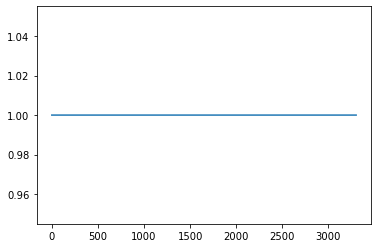

In [26]:
surf = pd.read_csv('CHIRP_Surface_TWT_V1.0.csv', sep='\t')
surf = surf[surf['Segment'] == '20190107_01']
surf = surf[surf['Frame'] == 3]
surf = surf[['Segment', 'Frame', 'CMP', 'Surf_TWT']]

surf['Frame_'] = surf['Segment'].astype(str) + '_00' + surf['Frame'].astype(str)
surf = surf.reset_index(drop=True)

plt.plot(np.diff(surf['CMP']))

In [25]:
surf

,Flightnumber,Segment,Line,Frame,CMP,Lon,Lat,Surf_TWT
389423,1.901071e+09,20190107_01,20197016,3,2,27.028490,-70.176231,4322.589844
389424,1.901071e+09,20190107_01,20197016,3,3,27.028454,-70.176369,4322.080078
389425,1.901071e+09,20190107_01,20197016,3,4,27.028418,-70.176498,4321.509766
389426,1.901071e+09,20190107_01,20197016,3,5,27.028379,-70.176636,4320.939941
389427,1.901071e+09,20190107_01,20197016,3,6,27.028343,-70.176773,4319.020020
...,...,...,...,...,...,...,...,...
392720,1.901071e+09,20190107_01,20197016,3,3299,25.780033,-70.189354,4566.100098
392721,1.901071e+09,20190107_01,20197016,3,3300,25.779890,-70.189484,4572.890137
392722,1.901071e+09,20190107_01,20197016,3,3301,25.779747,-70.189606,4571.620117
392723,1.901071e+09,20190107_01,20197016,3,3302,25.779604,-70.189735,4575.729980


In [4]:
picks[picks['profileID'] == 3].reset_index(drop=True)

,year_acq,month_acq,day_acq,surveyID,profileID,lon,lat,psX,psY,trace,...,IRH3,IRH4,IRH5,IRH6,IRH7,IRH8,IRH9,IRH10,IRH11,IRH12
0,2019,1,7,1,3,27.029289,-70.175852,988339.011780,1.937276e+06,1,...,2.035940e-07,2.711620e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,7,1,3,27.029273,-70.175906,988335.754625,1.937271e+06,2,...,2.035940e-07,2.711620e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,7,1,3,27.029257,-70.175959,988332.498157,1.937266e+06,3,...,2.035940e-07,2.711620e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,7,1,3,27.029242,-70.176013,988329.241862,1.937261e+06,4,...,2.008920e-07,2.711620e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,7,1,3,27.029226,-70.176066,988325.986240,1.937255e+06,5,...,2.008920e-07,2.711620e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,2019,1,7,1,3,26.084428,-70.180312,956039.240137,1.952862e+06,6196,...,4.683760e-08,1.062970e-07,NaN,1.900810e-07,3.711620e-07,NaN,5.549460e-07,6.062970e-07,7.171080e-07,7.873780e-07
6196,2019,1,7,1,3,26.084270,-70.180308,956034.086130,1.952865e+06,6197,...,4.954030e-08,1.090000e-07,NaN,1.927840e-07,3.738650e-07,NaN,5.522430e-07,6.062970e-07,7.198110e-07,7.954860e-07
6197,2019,1,7,1,3,26.084112,-70.180303,956028.934010,1.952868e+06,6198,...,4.954030e-08,1.090000e-07,NaN,1.927840e-07,3.738650e-07,NaN,5.549460e-07,6.090000e-07,7.225130e-07,8.008920e-07
6198,2019,1,7,1,3,26.083955,-70.180299,956023.780375,1.952871e+06,6199,...,5.494570e-08,1.090000e-07,NaN,1.927840e-07,3.711620e-07,NaN,5.522430e-07,6.090000e-07,7.225130e-07,8.008920e-07


In [34]:
dir = 'C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/20190107_02_standard/'
os.chdir(dir)

filelist = []

for matfile in sorted(glob.glob('Data_20190107_02*.mat')):

    crd = Cradar().load_cresis_mat(matfile, dB=False)
    crd.Frame = matfile.split('Data_')[-1].split('.mat')[0]
    crd.to_dB()
    crd.clip_range(start=0, end=4000)
    filelist.append(crd)

crd = Cradar.concat_frames(filelist)

crd.write_shape()

==> Loaded Data_20190107_02_001
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190107_02_002
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190107_02_003
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190107_02_004
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Added pixel index of surface reflection
==> Concatenated ['20190107_02_001', '20190107_02_002', '20190107_02_003', '20190107_02_004']


c:\Users\sfranke\Miniconda3\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


==> Written: shapes/20190107_02_001_concat.shp


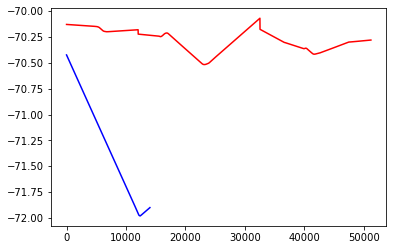

In [30]:
plt.plot(picks['lat'], color='red')
plt.plot(crd.Latitude, color='blue')

In [18]:
picks_x = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')
picks_x

,year_acq,month_acq,day_acq,surveyID,profileID,lon,lat,psX,psY,trace,...,IRH4,IRH5,IRH6,IRH7,IRH8,IRH9,IRH10,IRH11,IRH12,IRH13
0,2019,2,6,2,2,26.255711,-71.060848,918364.340236,1.861791e+06,1,...,NaN,NaN,NaN,NaN,NaN,1.459459e-07,NaN,NaN,NaN,NaN
1,2019,2,6,2,2,26.255746,-71.060796,918368.062922,1.861795e+06,2,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
2,2019,2,6,2,2,26.255781,-71.060743,918371.788661,1.861800e+06,3,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
3,2019,2,6,2,2,26.255816,-71.060691,918375.518137,1.861805e+06,4,...,NaN,NaN,NaN,NaN,NaN,1.567568e-07,NaN,NaN,NaN,NaN
4,2019,2,6,2,2,26.255851,-71.060638,918379.252995,1.861810e+06,5,...,NaN,NaN,NaN,NaN,NaN,1.594595e-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42782,2019,2,6,2,2,20.350991,-70.324733,750548.921420,2.023461e+06,10220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42783,2019,2,6,2,2,20.351001,-70.324787,750547.207266,2.023455e+06,10221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42784,2019,2,6,2,2,20.351013,-70.324841,750545.515511,2.023450e+06,10222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42785,2019,2,6,2,2,20.351025,-70.324895,750543.848443,2.023444e+06,10223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')

irh_list = ['IHR1', 'IHR2', 'IHR3', 'IHR4', 'IHR5', 'IHR6', 'IHR7', 
            'IHR8', 'IHR9', 'IHR10', 'IHR11', 'IHR12', 'IHR13']

for irh in irh_list:
    layer_name = str(irh)
    layer_lon  = picks['lon']
    layer_lat  = picks['lat']
    layer_val  = picks[irh]

    crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
    print('==> added layer: {}'.format(layer_name))

In [20]:
picks

,year_acq,month_acq,day_acq,surveyID,profileID,lon,lat,psX,psY,trace,...,IRH4,IRH5,IRH6,IRH7,IRH8,IRH9,IRH10,IRH11,IRH12,IRH13
0,2019,2,6,2,2,26.255711,-71.060848,918364.340236,1.861791e+06,1,...,NaN,NaN,NaN,NaN,NaN,1.459459e-07,NaN,NaN,NaN,NaN
1,2019,2,6,2,2,26.255746,-71.060796,918368.062922,1.861795e+06,2,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
2,2019,2,6,2,2,26.255781,-71.060743,918371.788661,1.861800e+06,3,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
3,2019,2,6,2,2,26.255816,-71.060691,918375.518137,1.861805e+06,4,...,NaN,NaN,NaN,NaN,NaN,1.567568e-07,NaN,NaN,NaN,NaN
4,2019,2,6,2,2,26.255851,-71.060638,918379.252995,1.861810e+06,5,...,NaN,NaN,NaN,NaN,NaN,1.594595e-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42782,2019,2,6,2,2,20.350991,-70.324733,750548.921420,2.023461e+06,10220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42783,2019,2,6,2,2,20.351001,-70.324787,750547.207266,2.023455e+06,10221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42784,2019,2,6,2,2,20.351013,-70.324841,750545.515511,2.023450e+06,10222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42785,2019,2,6,2,2,20.351025,-70.324895,750543.848443,2.023444e+06,10223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
crd.Layer['IRH2']['value_twt_corr'] = crd.Layer['IRH2']['value_twt'] + 12

In [18]:
crd.Layer['IRH2']['value_twt_corr']

array([        nan,         nan,         nan, ..., 12.00000011,
       12.0000001 , 12.00000011])

In [79]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

from scipy import spatial



picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')

points = []

for i in range(len(crd.Longitude)):
    pt = Point(crd.Longitude[i], crd.Latitude[i])
    points.append(pt)

crd_points = gpd.GeoDataFrame(geometry=points, crs=4326)
crd_points['Longitude'] = pd.DataFrame(crd.Longitude)
crd_points['Latitude']  = pd.DataFrame(crd.Latitude)
crd_points['Trace']     = pd.DataFrame(crd.Trace)


picks = picks[['lon', 'lat', 'IRH2']]#[1000:9000].reset_index(drop=True)

crd_locs    = list(zip(crd.Longitude, crd.Latitude))
tree        = spatial.KDTree(crd_locs)
npt_traces  = []
npt_values  = []
crd_coords  = []
pick_coords = []

for j in range(len(picks)):
    pick_loc    = (picks['lon'][j], picks['lat'][j])
    val        = picks['IRH2'][j]
    npt_trace  = tree.query([pick_loc])[1][0]

    npt_traces.append(npt_trace)
    npt_values.append(val)
    crd_coords.append(str(crd_locs[npt_trace]))
    pick_coords.append(str(pick_loc))

dff                = pd.DataFrame(np.array(npt_traces))
dff['vals']        = pd.DataFrame(np.array(npt_values))
dff['crd_coords']  = pd.DataFrame(np.array(crd_coords))
dff['pick_coords'] = pd.DataFrame(np.array(pick_coords))

dff.columns = ['traces', 'values', 'crd_coords', 'pick_coords']
dff

# airports = [(10,10),(20,20),(30,30),(40,40)]
# tree = spatial.KDTree(airports)
# tree.query([(21,21)])

# (array([ 1.41421356]), array([1]))


# npt_traces = []
# npt_values = []

# for j in range(len(picks)):

#     loc = Point(picks['lon'][j], picks['lat'][j])
#     val = picks['IRH9'][j]

#     npt       = nearest_points(loc, MultiPoint(crd_points.geometry.values))[1]
#     npt_row   = crd_points.loc[crd_points.geometry == npt]
#     npt_trace = npt_row['Trace'].values[0]

#     npt_traces.append(npt_trace)
#     npt_values.append(val)

# dff         = pd.DataFrame(np.array(npt_traces))
# dff['vals'] = pd.DataFrame(np.array(npt_values))
# dff.columns = ['traces', 'values']
# dff

,traces,values,crd_coords,pick_coords
0,14427,NaN,"(26.255711493821643, -71.06084839701283)","(26.2557114938216, -71.0608483970128)"
1,14428,NaN,"(26.255746209939083, -71.06079582109108)","(26.2557462099391, -71.0607958210911)"
2,14429,NaN,"(26.255781030192708, -71.06074325196835)","(26.2557810301927, -71.0607432519683)"
3,14430,NaN,"(26.255815978141573, -71.06069069135742)","(26.2558159781416, -71.0606906913574)"
4,14431,NaN,"(26.255851111209985, -71.06063814369928)","(26.25585111121, -71.0606381436993)"
...,...,...,...,...
42782,64846,9.729730e-08,"(20.35099052591586, -70.32473341206487)","(20.3509905259159, -70.3247334120649)"
42783,64847,1.027027e-07,"(20.351001339832234, -70.32478732678084)","(20.3510013398322, -70.3247873267808)"
42784,64848,1.054054e-07,"(20.35101274312332, -70.32484120068935)","(20.3510127431233, -70.3248412006893)"
42785,64849,1.027027e-07,"(20.351024798308337, -70.32489503171949)","(20.3510247983083, -70.3248950317195)"


In [86]:
crd.Frame.new = 'xx'

AttributeError: 'str' object has no attribute 'new'

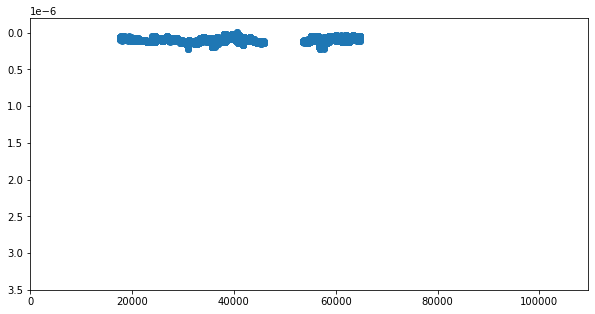

In [84]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
#plt.plot(dff['values'])
plt.scatter(x=dff['traces'], y=dff['values'])

plt.xlim(0, len(crd.Longitude))
plt.ylim(-0.2e-6, 3.5e-6)
ax = plt.gca()
ax.invert_yaxis()

In [1]:
from Cradar import Cradar

crd = Cradar()
crd

NameError: name 'Cradar' is not defined

In [18]:
npt      = nearest_points(loc, MultiPoint(crd_points.geometry.values))

<GeometryArray>
 ...
Length: 9562, dtype: geometry

In [13]:
picks = picks[['lon', 'lat', 'IRH9']]

loc1 = Point(picks['lon'][1000], picks['lat'][1000])
val1 = picks['IRH9'][1000]

np     = nearest_points(intersec_coords[i], frame2_points)[1]
np_row = gdf_point.loc[gdf_point.geometry == np_frame2]

1.56756756756751e-07